## Required libraries 

In [423]:
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn import linear_model
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA

##Loading the Dataset




In [424]:
#Loading the Dataset
weather_pdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherHistory.csv')
print(weather_pdf.shape)
# Checking the data set is completely Loaded by printing top 10 orlast 10 data rows
weather_pdf.tail(10)

(96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96443,2016-09-09 14:00:00.000 +0200,Partly Cloudy,rain,30.894444,29.450000,0.28,14.7798,43.0,15.5526,0.0,1014.66,Partly cloudy starting in the morning.
96444,2016-09-09 15:00:00.000 +0200,Partly Cloudy,rain,31.083333,29.616667,0.28,15.5043,40.0,16.1000,0.0,1014.17,Partly cloudy starting in the morning.
96445,2016-09-09 16:00:00.000 +0200,Partly Cloudy,rain,31.083333,29.611111,0.28,13.8943,40.0,16.1000,0.0,1013.97,Partly cloudy starting in the morning.
96446,2016-09-09 17:00:00.000 +0200,Partly Cloudy,rain,30.766667,29.311111,0.28,14.2163,24.0,15.5526,0.0,1013.83,Partly cloudy starting in the morning.
96447,2016-09-09 18:00:00.000 +0200,Partly Cloudy,rain,28.838889,27.850000,0.32,12.2038,21.0,16.1000,0.0,1014.07,Partly cloudy starting in the morning.
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [425]:
#Checking the Infomation about data set
weather_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Handling Duplicates & null Values

In [426]:
#Checking Duplicates values coroosopnding to same Date value
print("Records before Removing Duplicates : "+format(weather_pdf.shape))
weather_pdf = weather_pdf.drop_duplicates(['Formatted Date'], keep='first')
print("Records before Removing Duplicates : "+format(weather_pdf.shape))

Records before Removing Duplicates : (96453, 12)
Records before Removing Duplicates : (96429, 12)


In [427]:
# Drop Loud Cover beacuse is a null value column 
weather_pdf = weather_pdf.drop(columns=["Loud Cover"],axis=1)
print(weather_pdf.shape)

(96429, 11)


In [428]:
#Checking for the colums with NULL values
weather_pdf.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [429]:
#Check the percentage of the NULL valued colums 
round(100*(weather_pdf.isnull().sum()/len(weather_pdf.index)),2)

Formatted Date              0.00
Summary                     0.00
Precip Type                 0.54
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Humidity                    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64

Removing null valued records

In [430]:
weather_pdf = weather_pdf[weather_pdf['Precip Type'].notna()]
print(weather_pdf.shape)

(95912, 11)


In [431]:
#Check the percentage of the NULL valued colums after filling missing values 
round(100*(weather_pdf.isnull().sum()/len(weather_pdf.index)),2)

Formatted Date              0.0
Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Pressure (millibars)        0.0
Daily Summary               0.0
dtype: float64

## Plot box plots for outliers detection

All box plots

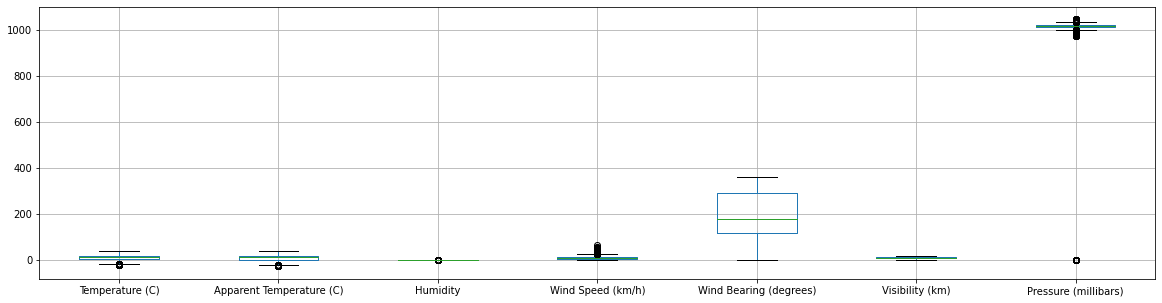

In [432]:
#Plot boxplot for outliers detection
weather_pdf.boxplot(figsize=(20,5))

Box Plot for Temperature (C)

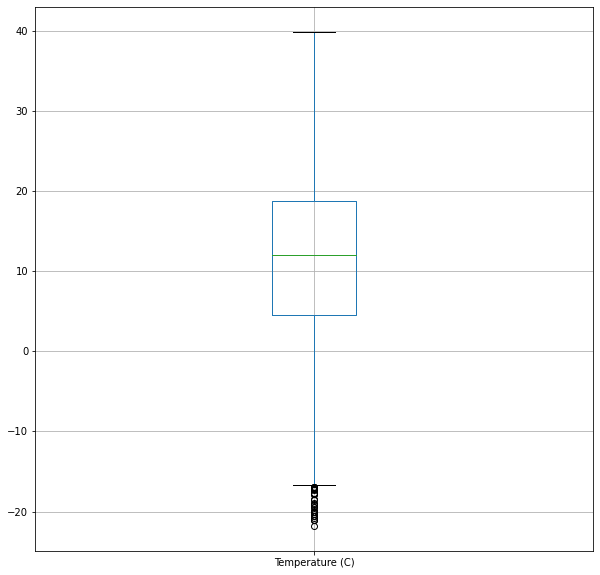

In [433]:
#Plotting Temperature (C) Box Plot
weather_pdf.boxplot(column=['Temperature (C)'],figsize=(10,10))

Box Plot for Apparent Temperature (C)

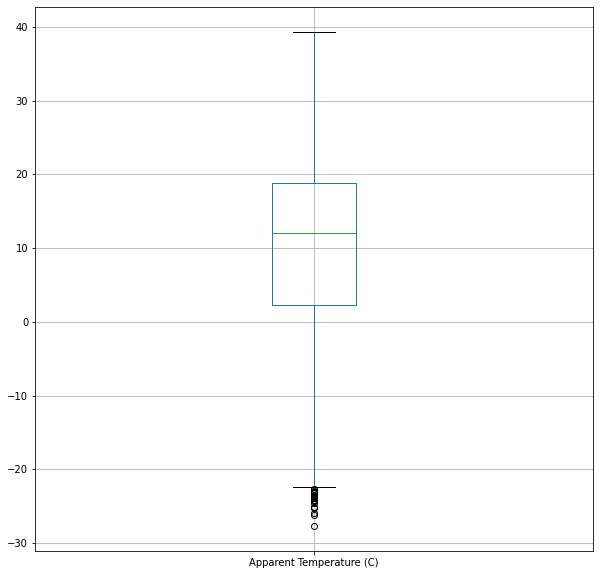

In [434]:
#Plotting Apparent Temperature (C) Box Plot
weather_pdf.boxplot(column=['Apparent Temperature (C)'],figsize=(10,10))

Box Plot for Humidity

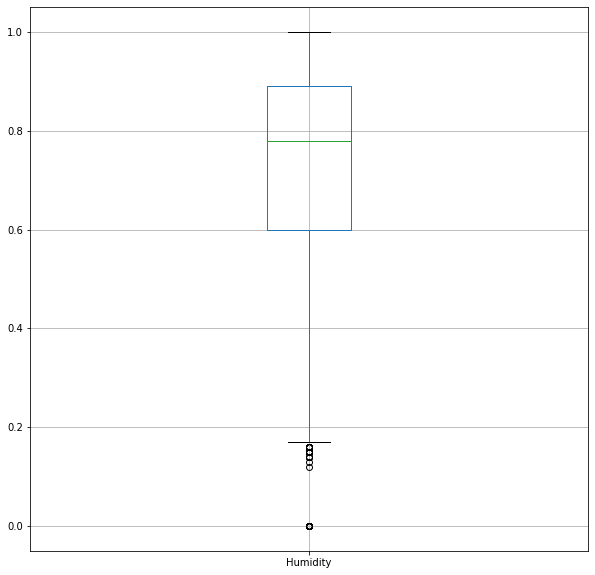

In [435]:
#Plotting Humidity Box Plot
weather_pdf.boxplot(column=['Humidity'],figsize=(10,10))

Since Humidity Zero Vales cannot exist let's drop humidity values having Zero

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

(95912, 11)
(95890, 11)


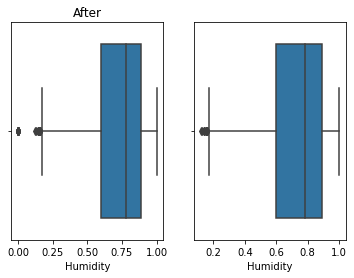

In [436]:
fig, axes = plt.subplots(1,2)
axes[0].title.set_text("Before")
sns.boxplot(weather_pdf['Humidity'],orient='v',ax=axes[0])
# Checking Shape of Dataframe before dropping Humidity  0 values
print(weather_pdf.shape)
# Dropping Humidity 0 values
weather_pdf = weather_pdf[weather_pdf['Humidity'] != 0.0]
axes[0].title.set_text("After")
sns.boxplot(weather_pdf['Humidity'],orient='v',ax=axes[1])
# Checking Shape of Dataframe after dropping Humidity 0 values
print(weather_pdf.shape)

Box Plot for Wind Speed (km/h)

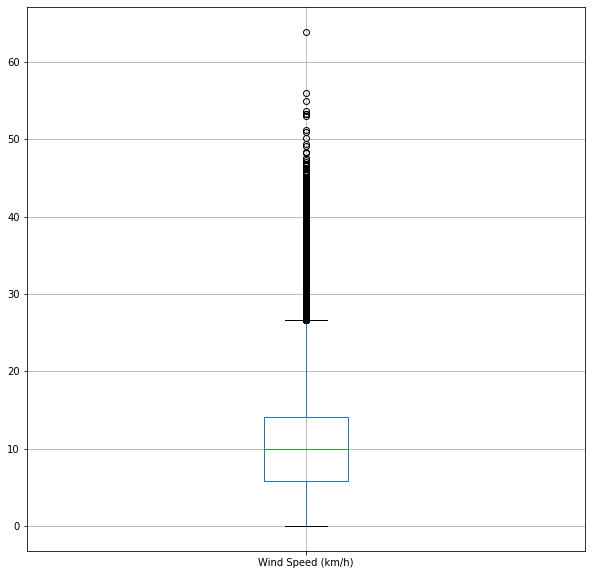

In [437]:
#Plotting Wind Speed (km/h) Box Plot
weather_pdf.boxplot(column=['Wind Speed (km/h)'],figsize=(10,10))

Box Plot for Wind Bearing (degrees)

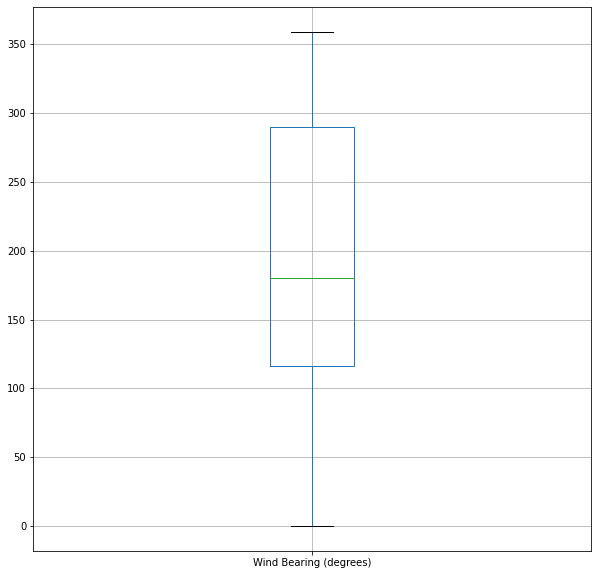

In [438]:
#Plotting Wind Bearing (degrees) Box Plot
weather_pdf.boxplot(column=['Wind Bearing (degrees)'],figsize=(10,10))

Box Plot for Visibility (km)

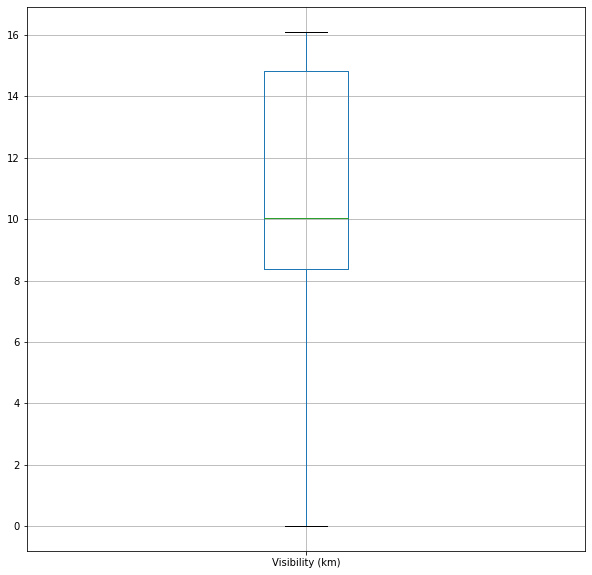

In [439]:
#Plotting Visibility (km) Box Plot
weather_pdf.boxplot(column=['Visibility (km)'],figsize=(10,10))

Box Plot for Pressure (millibars)

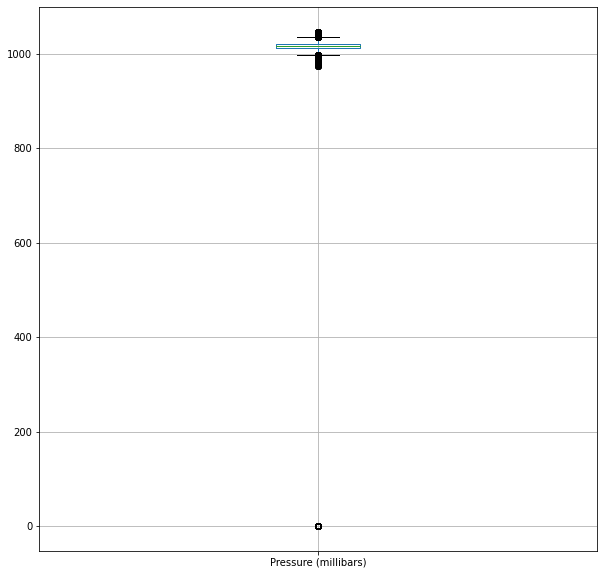

In [440]:
#Plotting Pressure (millibars) Box Plot
weather_pdf.boxplot(column=['Pressure (millibars)'],figsize=(10,10))

Since Pressure (millibars) values cannot be zero, let's drop values having zero

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

(95890, 11)
(94602, 11)


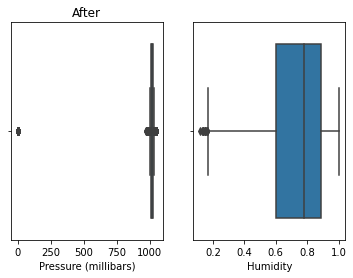

In [441]:
fig, axes = plt.subplots(1,2)
axes[0].title.set_text("Before")
sns.boxplot(weather_pdf['Pressure (millibars)'],orient='v',ax=axes[0])
# Checking Shape of Dataframe before dropping Pressure (millibars) 0 values
print(weather_pdf.shape)
# Dropping Pressure (millibars) 0 values
weather_pdf = weather_pdf[weather_pdf['Pressure (millibars)'] != 0]
axes[0].title.set_text("After")
sns.boxplot(weather_pdf['Humidity'],orient='v',ax=axes[1])
# Checking Shape of Dataframe after dropping Pressure (millibars) 0 values
print(weather_pdf.shape)

## Plot Q-Q plots and Histrograms


All Histrograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94aa009850>,
      dtype=object)

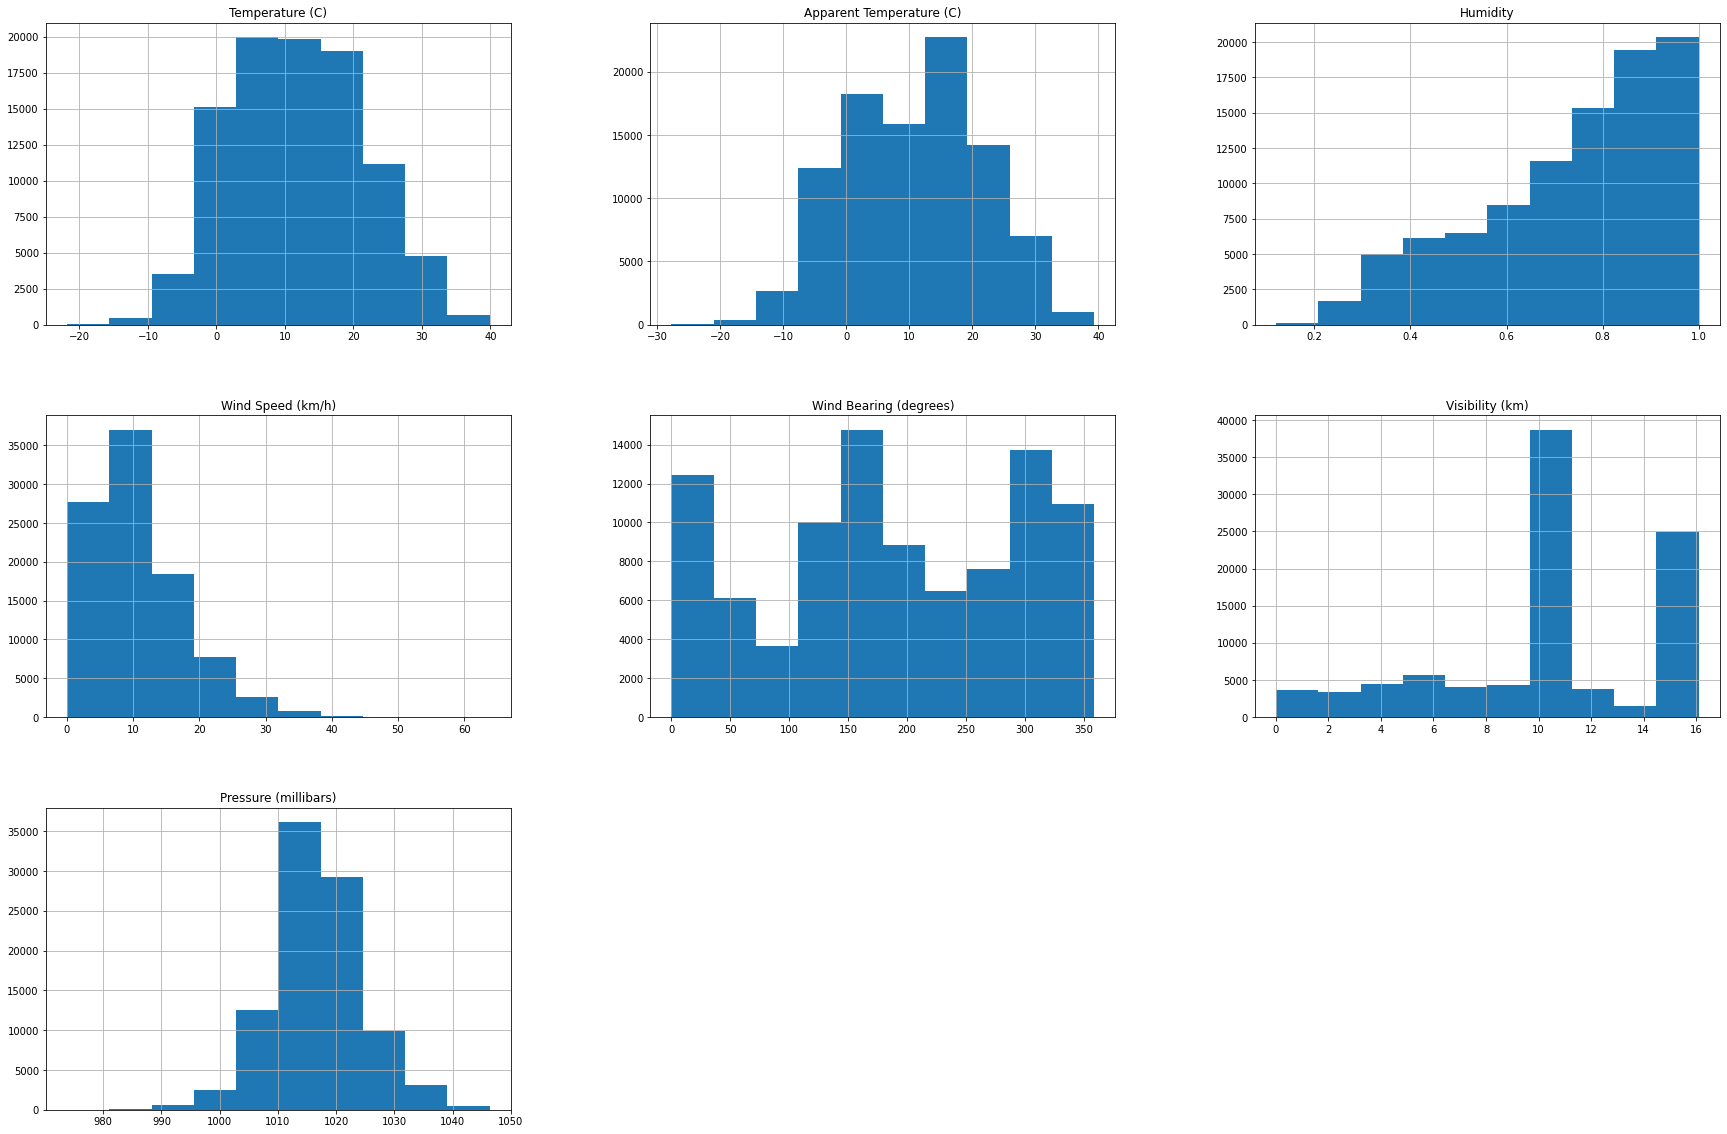

In [442]:
weather_pdf.hist(figsize=(30,20))

Q-Q plot and histrogram for Temperature (C)



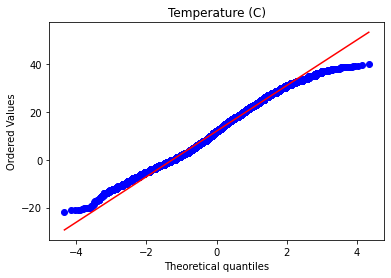

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94a9c84e90>]],
      dtype=object)

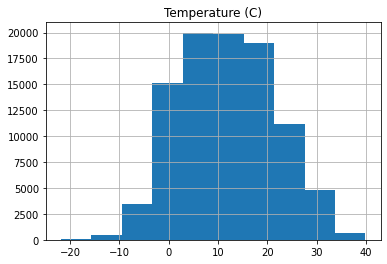

In [443]:
current_feature = "Temperature (C)"
stats.probplot(weather_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(weather_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for Apparent Temperature (C)

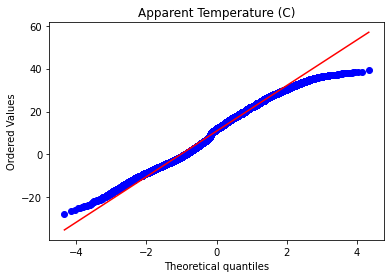

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94a995c990>]],
      dtype=object)

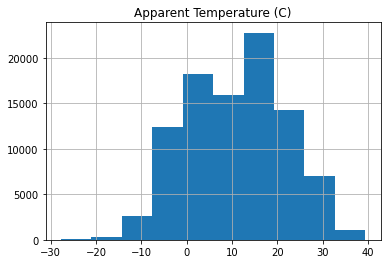

In [444]:
current_feature = "Apparent Temperature (C)"
stats.probplot(weather_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(weather_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for Humidity

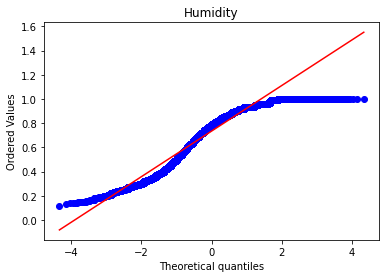

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94a9a5ffd0>]],
      dtype=object)

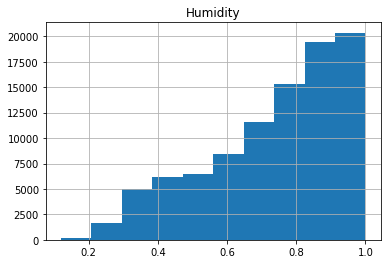

In [445]:
current_feature = "Humidity"
stats.probplot(weather_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(weather_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Since Humidity has left skewed , let's apply exponential transformation 

In [446]:
exponential_transformer = FunctionTransformer(lambda x: x**2, validate=True)
data_transformed = exponential_transformer.transform(weather_pdf[[current_feature]])
weather_pdf[current_feature] = data_transformed

Q-Q plot and histrogram for Wind Speed (km/h)

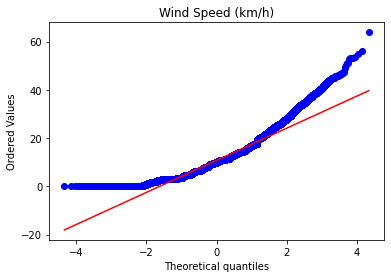

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94a9879d10>]],
      dtype=object)

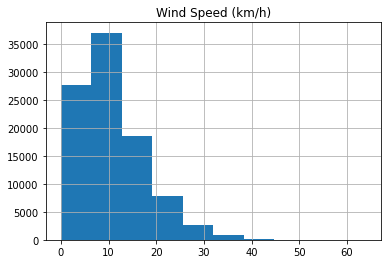

In [447]:
current_feature = "Wind Speed (km/h)"
stats.probplot(weather_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(weather_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Wind Speed has right skewed. We can apply either logarithm or Squre Root trasnformation

In [448]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(weather_pdf[[current_feature]])
weather_pdf[current_feature] = data_transformed

Q-Q plot and histrogram for Wind Bearing (degrees)

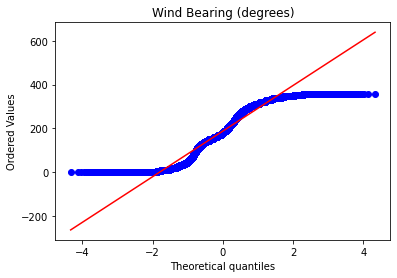

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94a96f0410>]],
      dtype=object)

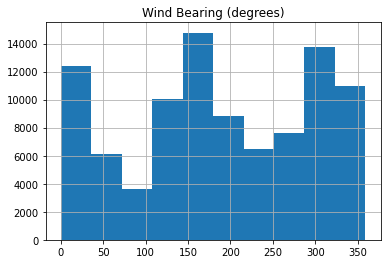

In [449]:
current_feature = "Wind Bearing (degrees)"
stats.probplot(weather_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(weather_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for Visibility (km)

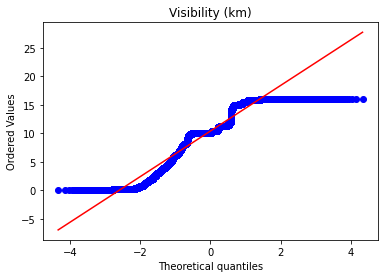

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94a95c4cd0>]],
      dtype=object)

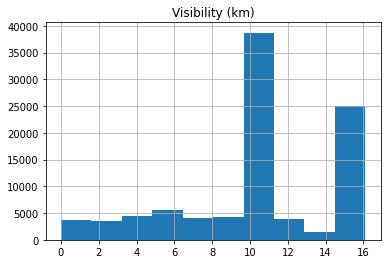

In [450]:
current_feature = "Visibility (km)"
stats.probplot(weather_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(weather_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for Pressure (millibars)

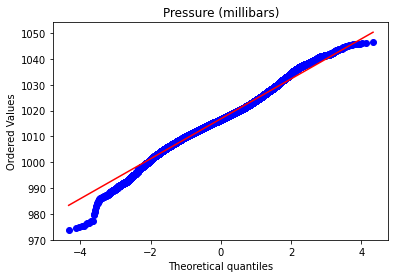

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94a986fb10>]],
      dtype=object)

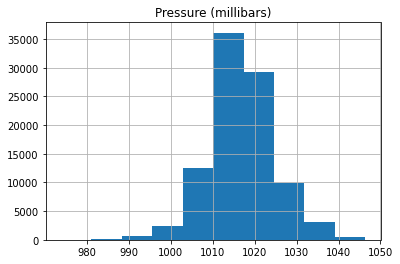

In [451]:
current_feature = "Pressure (millibars)"
stats.probplot(weather_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(weather_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Plot the histrogram again to see how transformation affected

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94a94d4390>,
      dtype=object)

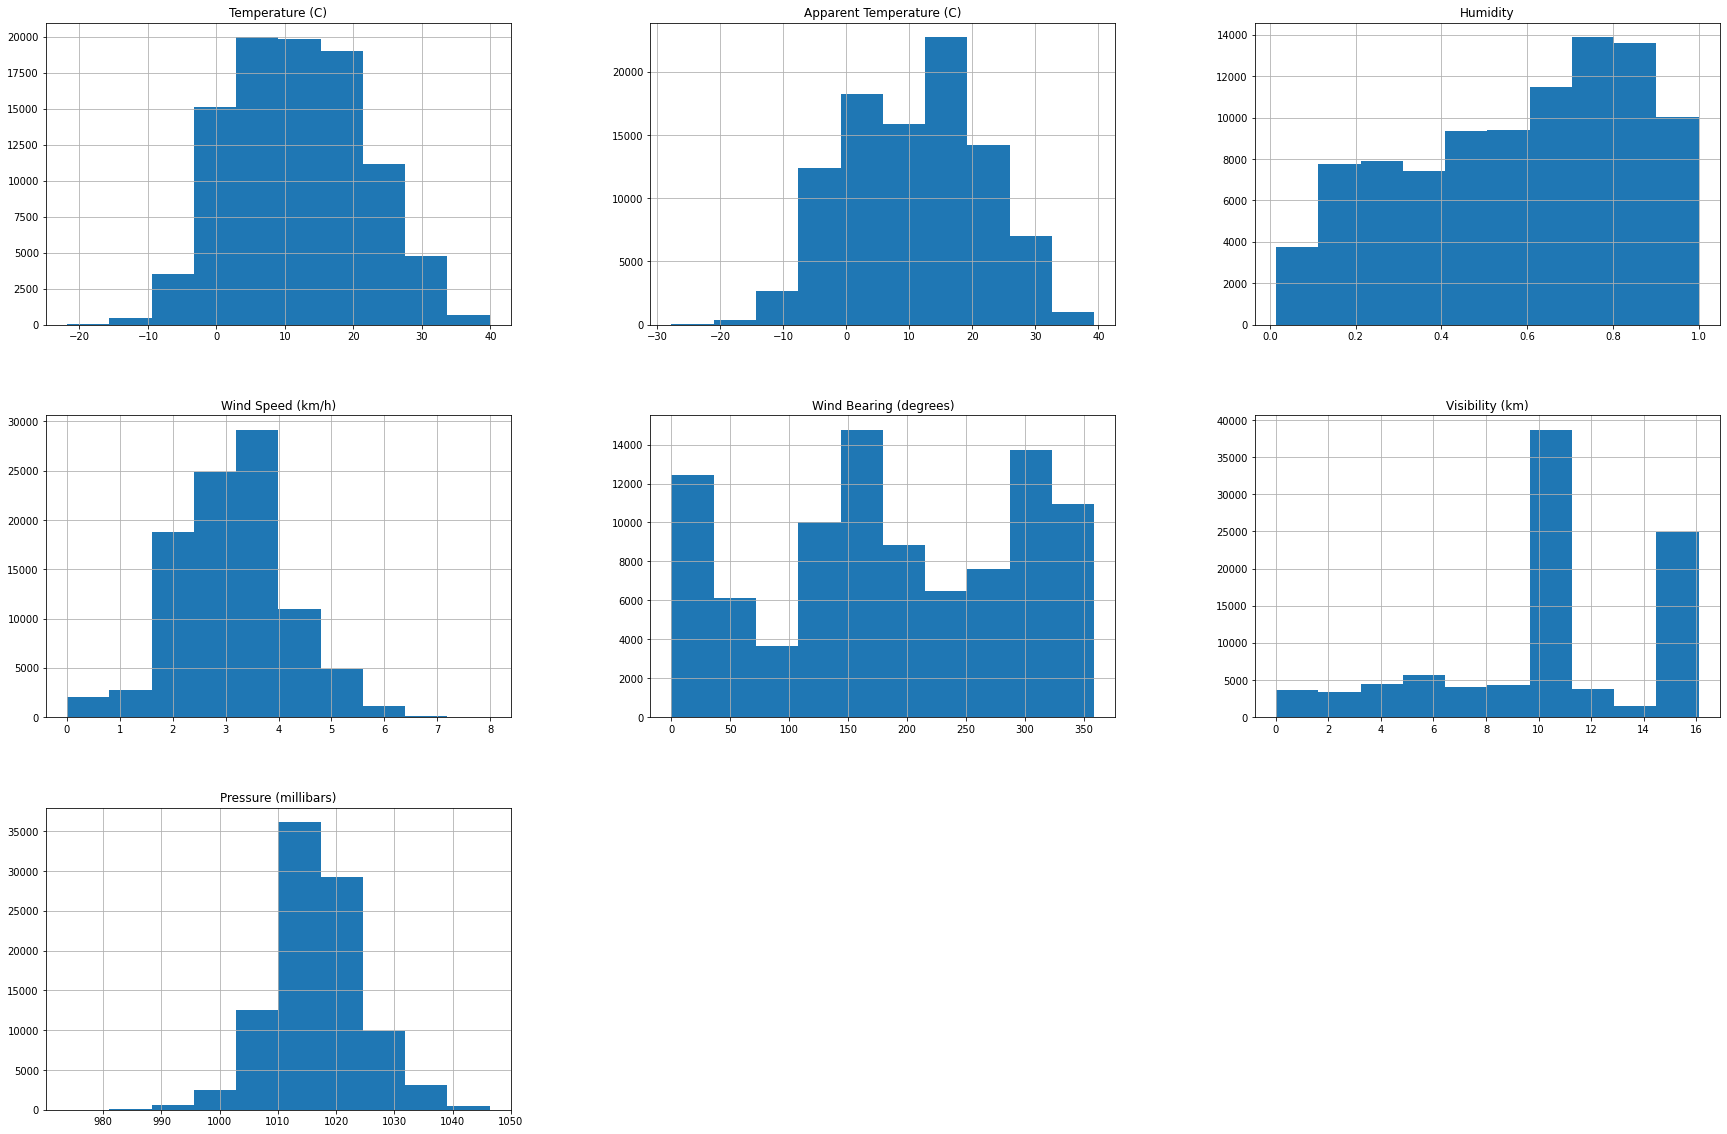

In [452]:

weather_pdf.hist(figsize=(30,20))

## Data Encoding

In [453]:
# Use label encorder
labelencoder = LabelEncoder()

weather_pdf['Summary']= labelencoder.fit_transform(weather_pdf['Summary'])
weather_pdf['Daily Summary']= labelencoder.fit_transform(weather_pdf['Daily Summary'])
weather_pdf['Precip Type']= labelencoder.fit_transform(weather_pdf['Precip Type'])

weather_pdf.head(10)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.7921,3.757619,251.0,15.8263,1015.13,197
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.7396,3.776851,259.0,15.8263,1015.63,197
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.7921,1.982019,204.0,14.9569,1015.94,197
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.6889,3.755476,269.0,15.8263,1016.41,197
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.6889,3.323342,259.0,15.8263,1016.51,197
5,2006-04-01 05:00:00.000 +0200,19,0,9.222222,7.111111,0.7225,3.736134,258.0,14.9569,1016.66,197
6,2006-04-01 06:00:00.000 +0200,19,0,7.733333,5.522222,0.9025,3.516362,259.0,9.9820,1016.72,197
7,2006-04-01 07:00:00.000 +0200,19,0,8.772222,6.527778,0.7921,3.761901,260.0,9.9820,1016.84,197
8,2006-04-01 08:00:00.000 +0200,19,0,10.822222,10.822222,0.6724,3.364268,259.0,9.9820,1017.37,197
9,2006-04-01 09:00:00.000 +0200,19,0,13.772222,13.772222,0.5184,3.539181,279.0,9.9820,1017.22,197


## Data Scaling and Strandardzation

In [454]:
#Removing Categorical Features before the standardization
X_Dummy = weather_pdf.drop(columns=['Precip Type', 'Summary','Daily Summary','Formatted Date'])
X_Dummy
# Getting Column Names
columns_values = X_Dummy.columns

#Applying Standardization 
#step 1 - Calling the standard scaler
scaler = StandardScaler() 
scaler.fit(X_Dummy) 
X_Scaled = scaler.transform(X_Dummy)
X_Scaled_Except = pd.DataFrame(X_Scaled,columns=columns_values)
X_standard = X_Scaled_Except



In [455]:
#Heat map to find relatonship between each feature
X_standard.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992657,-0.620776,0.022148,0.030212,0.393237,-0.309808
Apparent Temperature (C),0.992657,1.000000,-0.592456,-0.045260,0.029409,0.381814,-0.287609
Humidity,-0.620776,-0.592456,1.000000,-0.246352,0.000528,-0.422923,0.041747
Wind Speed (km/h),0.022148,-0.045260,-0.246352,1.000000,0.121276,0.108537,-0.251614
Wind Bearing (degrees),0.030212,0.029409,0.000528,0.121276,1.000000,0.048810,-0.078195
Visibility (km),0.393237,0.381814,-0.422923,0.108537,0.048810,1.000000,-0.162690
Pressure (millibars),-0.309808,-0.287609,0.041747,-0.251614,-0.078195,-0.162690,1.000000


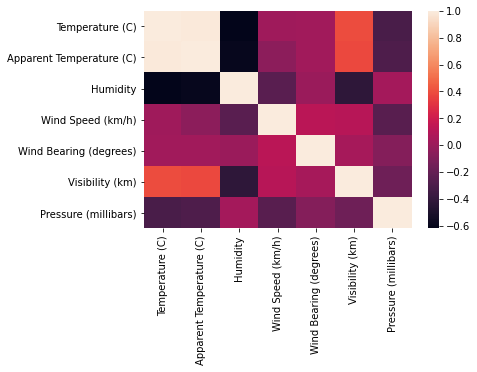

In [456]:
#Heat map to find relatonship between each feature

sns.heatmap(X_standard.corr());


In [457]:
#Removing Independant Variable : Y
X = X_standard.drop(columns=["Apparent Temperature (C)"])

##Appling PCA

In [458]:

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [459]:
print(X_pca.shape)
X_before_pca = X
X=X_pca


(94602, 2)


In [460]:
pd.DataFrame(X,columns=["PCA 1","PCA2"])

,PCA 1,PCA2
0,-0.292011,0.835368
1,-0.386157,0.808212
2,0.297062,-0.379637
3,-0.402173,0.776119
4,-0.316270,0.474010
...,...,...
94597,-2.313851,-1.441413
94598,-2.000628,-1.523372
94599,-1.686164,-1.482804
94600,-1.598030,-1.360086


## Create training and testing vars


In [461]:
from sklearn.model_selection import train_test_split
y_true = X_standard["Apparent Temperature (C)"]
X_train, X_test, y_train, y_test = train_test_split(X,y_true, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(75681, 2) (75681,)
(18921, 2) (18921,)


##Implementing Linear Regression

In [417]:

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_hat = pd.DataFrame(lm.predict(X_test),columns=["predicted"])


## Calculations

In [418]:
 #Calcualting MSE of y_hat and y
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat)
print("Mean Squre Error is : "+ "{:.2%}".format(mse))

Mean Squre Error is : 31.21%


In [419]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(y_test, y_hat))
rmsq

0.558668010525849

In [420]:
#Percentage of explained variance of the predictions
print(lm.score(X,y_true))

0.688685030294045


In [421]:
#W parameters of the model
print(lm.coef_)

#Intercept of the model
print(lm.intercept_)

[-0.53485124 -0.26216154]
-0.00010801133357938794


## Drawing Distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


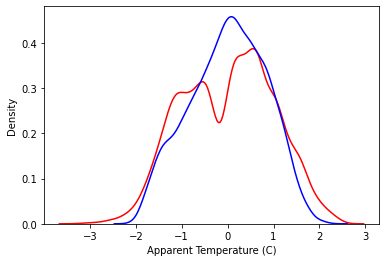

In [422]:

sns.distplot(y_test,hist=False,color ="r",label="Test")
sns.distplot(y_hat,hist=False,color ="b",label="HAT")
